In [1]:
import pandas as pd
import datetime as dt

# Define the start and end dates
start = dt.datetime(2021, 7, 1)
end = dt.datetime(2021, 12, 28)

# Load the CSV file and set 'Date' as the index
data = pd.read_csv('Tatacoffee13_21.csv', parse_dates=['Date'], index_col='Date')

# Filter the data based on the index
stk_data = data[(data.index >= start) & (data.index <= end)]

# Display the filtered data
print(stk_data)

              Open    High     Low   Close
Date                                      
2021-07-01  188.60  189.00  183.00  184.55
2021-07-02  183.05  187.50  182.15  186.40
2021-07-05  187.85  198.35  187.85  192.45
2021-07-06  193.80  194.80  187.35  188.80
2021-07-07  187.80  193.95  185.40  192.85
...            ...     ...     ...     ...
2021-12-22  202.90  207.80  201.35  205.00
2021-12-23  206.00  206.85  202.05  202.95
2021-12-24  203.90  203.90  199.35  201.00
2021-12-27  200.00  222.00  196.00  218.35
2021-12-28  219.65  220.45  211.55  212.35

[123 rows x 4 columns]


In [2]:

stk_data=stk_data[["Open","High","Low","Close"]]

In [3]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,188.60,189.00,183.00,184.55
2021-07-02,183.05,187.50,182.15,186.40
2021-07-05,187.85,198.35,187.85,192.45
2021-07-06,193.80,194.80,187.35,188.80
2021-07-07,187.80,193.95,185.40,192.85
...,...,...,...,...
2021-12-22,202.90,207.80,201.35,205.00
2021-12-23,206.00,206.85,202.05,202.95
2021-12-24,203.90,203.90,199.35,201.00


In [4]:
stk_data.index

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-05', '2021-07-06',
               '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-12',
               '2021-07-13', '2021-07-14',
               ...
               '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-20',
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-27', '2021-12-28'],
              dtype='datetime64[us]', name='Date', length=123, freq=None)

In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data)
print("Len:",data1.shape)

Len: (123, 4)


In [6]:
data1=pd.DataFrame(data1,columns=["Open","High","Low","Close"])
data1

,Open,High,Low,Close
0,0.111864,0.022422,0.083571,0.052680
1,0.017797,0.000000,0.067426,0.086876
2,0.099153,0.162182,0.175689,0.198706
3,0.200000,0.109118,0.166192,0.131238
4,0.098305,0.096413,0.129155,0.206100
...,...,...,...,...
118,0.354237,0.303438,0.432099,0.430684
119,0.406780,0.289238,0.445394,0.392791
120,0.371186,0.245142,0.394112,0.356747
121,0.305085,0.515695,0.330484,0.677449


In [7]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

98
X_train length: (98, 4)
X_test length: (25, 4)
y_train length: (98, 4)
y_test length: (25, 4)


In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
performance={"Model":[],"RMSE":[],"MaPe":[],"Lag":[],"Test":[]}

In [10]:
performance

{'Model': [], 'RMSE': [], 'MaPe': [], 'Lag': [], 'Test': []}

In [11]:
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import pandas as pd

def combination(dataset, listt):
    print(listt)
    datasetTwo = dataset[listt]
    test_obs = 28
    train = datasetTwo[:-test_obs]
    test = datasetTwo[-test_obs:]
    
    best_aic = float("inf")
    best_order = None
    best_model = None

    # First phase: Find the best lag order based on AIC
    for i in range(1, 11):
        model = VAR(train)
        results = model.fit(i)
        
        print(f'Order = {i}')
        print(f'AIC: {results.aic}')
        print(f'BIC: {results.bic}')
        print()
        
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = i
            best_model = results

    print(f'Best Order: {best_order} with AIC: {best_aic}')

    # Second phase: Fit the final VAR model with the best AIC order
    final_model = VAR(train)
    final_results = final_model.fit(best_order)

    # Make predictions
    lagged_values = train.values[-best_order:]
    pred = final_results.forecast(y=lagged_values, steps=28)
    preds = pd.DataFrame(pred, columns=listt)
    preds.to_csv("varforecasted_{}.csv".format(test_obs))

    # Evaluate the model

    performance = {"Model": [], "Lag": [], "Test": []}
    performance["Model"].append(listt)
    
    performance["Lag"].append(best_order)
    performance["Test"].append(test_obs)

    perf = pd.DataFrame(performance)

    
    print("************")

    return perf, final_results, pred,test


In [12]:
# Define the list of coloum
listt = ["Open", "High", "Low", "Close"]

# Now call the combination function
perf, final_results, pred, test = combination(data1, listt)

['Open', 'High', 'Low', 'Close']
Order = 1
AIC: -24.773550390390387
BIC: -24.232423840971236

Order = 2
AIC: -24.53752036268486
BIC: -23.557159268561016

Order = 3
AIC: -24.35755184605924
BIC: -22.932193085118477

Order = 4
AIC: -24.16923369533999
BIC: -22.2929870311296

Order = 5
AIC: -24.06310560350931
BIC: -21.729949911201064

Order = 6
AIC: -23.914905847924885
BIC: -21.118685207776416

Order = 7
AIC: -23.7209251632359
BIC: -20.455344816878263

Order = 8
AIC: -23.5351568665657
BIC: -19.79377903136564

Order = 9
AIC: -23.366103168399235
BIC: -19.142342705079244

Order = 10
AIC: -23.411123301254133
BIC: -18.69824322990811

Best Order: 1 with AIC: -24.773550390390387
************


In [13]:
len(data1)

123

In [14]:
print(data1.columns)

Index(['Open', 'High', 'Low', 'Close'], dtype='str')


In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

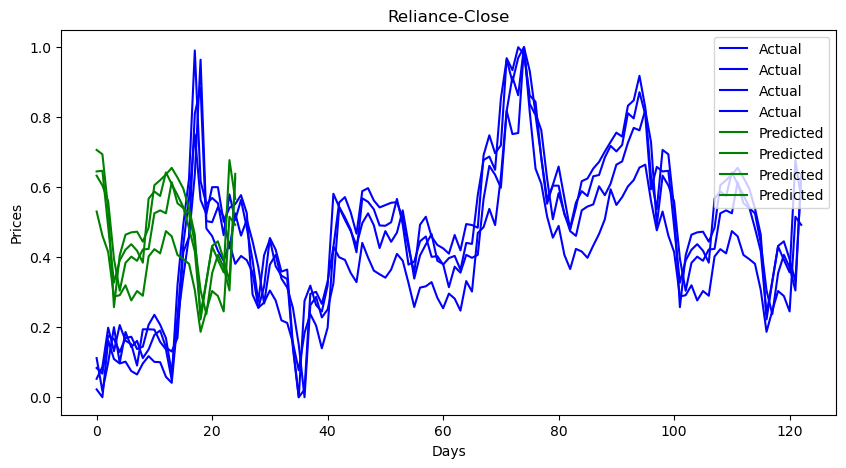

In [16]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","Reliance-Close","Days","Prices")

In [17]:
from stockFunctions import conversionSingle
print(data1.shape)
aTestNormTable=conversionSingle(data1,["Close"])
print(aTestNormTable.columns)
import numpy as np
X = np.array(aTestNormTable[['Close']].values)
X -= X.min()
X /= X.max()
X =X.reshape(-1, 1)
aTestNormTable = aTestNormTable[['Close']].reshape(-1, 1)
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable[['Close']].values.reshape(-1, 1))
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

(123, 4)


KeyError: 0

# from stockFunctions import conversionSingle
y_pred.reshape(-1)
pTestNormTable=conversionSingle(y_pred.reshape(-1),["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable.reshape(-1, 1))
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])
result_blocks = [np.array(b).flatten() for b in result_blocks]
out = type(self).from_blocks(result_blocks, [ax.view()])

In [18]:
from stockFunctions import graph
actual_stock_price_test_oriA = data['actual']
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-CLoseSARiMA","Days","Prices")

KeyError: 'actual'

In [19]:
print(data.columns)
column_dict = {'Open': 0, 'High': 1, 'Low': 2, 'Close': 3}

print(column_dict.keys())

Index(['Open', 'High', 'Low', 'Close'], dtype='str')
dict_keys(['Open', 'High', 'Low', 'Close'])


In [20]:
from statsmodels.tsa.arima.model import ARIMA
endog = data.iloc[:, 0].squeeze()
endog = data.values.reshape(-1, 1)
data1 = data.values.flatten()
model_fit = ARIMA(data1, order=(1,1,1)).fit()
forecast=model_fit.predict(start=len(data1), end=len(data1)+3)


In [21]:
forecast

array([208.50199428, 212.34769174, 208.50430115, 212.34538624])

In [22]:
some_value = 123.45
forecast_stock_price_test_oriF = some_value    #define the variable
forecast_stock_price_test_oriF

123.45